In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
# Check for device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
batch_size = 64
lr = 0.0002
z_dim = 100
num_epochs = 200
img_size = 28
img_channels = 1

In [3]:
# Transform for the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
]) 

In [4]:
# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [5]:
# Generator model
class Generator(nn.Module):
    def __init__(self, z_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, img_size * img_size * img_channels),
            nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x).view(-1, img_channels, img_size, img_size)

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            nn.Linear(img_size * img_size * img_channels, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x.view(-1, img_size * img_size * img_channels))

In [6]:
# Initialize Generator and Discriminator
gen = Generator(z_dim).to(device)
disc = Discriminator().to(device)

# Optimizers
optimizer_gen = optim.Adam(gen.parameters(), lr=lr)
optimizer_disc = optim.Adam(disc.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

In [7]:
# Function to generate noise for the Generator
def generate_noise(batch_size, z_dim, device):
    return torch.randn(batch_size, z_dim).to(device)

# Function to visualize generated samples
def visualize_fake_images(generator, z_dim, num_images=16):
    noise = generate_noise(num_images, z_dim, device)
    fake_images = generator(noise).detach().cpu()
    grid = torchvision.utils.make_grid(fake_images, normalize=True)
    plt.imshow(grid.permute(1, 2, 0))
    plt.show()

Epoch [1/200] Loss D: 0.2940, Loss G: 2.7340
Epoch [2/200] Loss D: 0.3826, Loss G: 1.8302
Epoch [3/200] Loss D: 1.0252, Loss G: 0.9439
Epoch [4/200] Loss D: 0.2854, Loss G: 1.8791
Epoch [5/200] Loss D: 0.5542, Loss G: 1.9345
Epoch [6/200] Loss D: 0.1691, Loss G: 4.4180
Epoch [7/200] Loss D: 0.4995, Loss G: 2.7332
Epoch [8/200] Loss D: 0.2454, Loss G: 2.3250
Epoch [9/200] Loss D: 0.1574, Loss G: 3.9406
Epoch [10/200] Loss D: 0.2816, Loss G: 2.5983


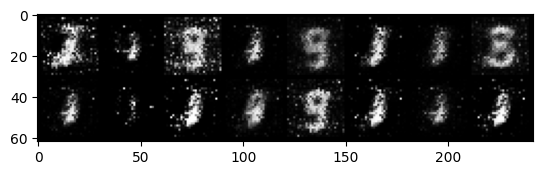

Epoch [11/200] Loss D: 0.2689, Loss G: 3.3306
Epoch [12/200] Loss D: 0.3016, Loss G: 2.4812
Epoch [13/200] Loss D: 0.3622, Loss G: 2.9909
Epoch [14/200] Loss D: 0.3627, Loss G: 3.0434
Epoch [15/200] Loss D: 0.2098, Loss G: 3.4315
Epoch [16/200] Loss D: 0.2597, Loss G: 2.2676
Epoch [17/200] Loss D: 0.2191, Loss G: 2.9322
Epoch [18/200] Loss D: 0.2226, Loss G: 3.1003
Epoch [19/200] Loss D: 0.1793, Loss G: 2.9831
Epoch [20/200] Loss D: 0.4267, Loss G: 2.6248


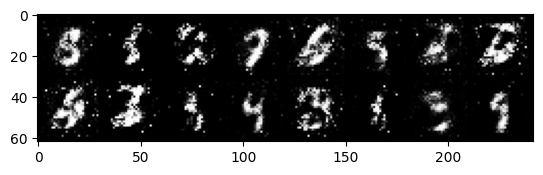

Epoch [21/200] Loss D: 0.3427, Loss G: 3.1771
Epoch [22/200] Loss D: 0.4744, Loss G: 1.8186
Epoch [23/200] Loss D: 0.4549, Loss G: 2.0357
Epoch [24/200] Loss D: 0.2349, Loss G: 2.1779
Epoch [25/200] Loss D: 0.4290, Loss G: 2.3401
Epoch [26/200] Loss D: 0.4548, Loss G: 1.9028
Epoch [27/200] Loss D: 0.3551, Loss G: 2.1463
Epoch [28/200] Loss D: 0.4201, Loss G: 2.9125
Epoch [29/200] Loss D: 0.2635, Loss G: 2.0526
Epoch [30/200] Loss D: 0.2717, Loss G: 2.1318


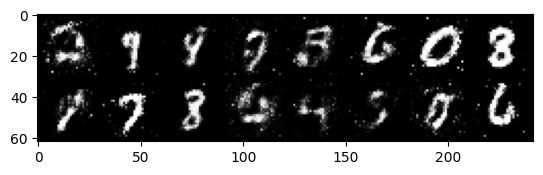

Epoch [31/200] Loss D: 0.3353, Loss G: 2.4438
Epoch [32/200] Loss D: 0.4585, Loss G: 1.5557
Epoch [33/200] Loss D: 0.6112, Loss G: 1.2758
Epoch [34/200] Loss D: 0.4435, Loss G: 2.3793
Epoch [35/200] Loss D: 0.3588, Loss G: 1.8987
Epoch [36/200] Loss D: 0.4737, Loss G: 1.5769
Epoch [37/200] Loss D: 0.4626, Loss G: 1.4802
Epoch [38/200] Loss D: 0.4190, Loss G: 1.3705
Epoch [39/200] Loss D: 0.4573, Loss G: 1.3348
Epoch [40/200] Loss D: 0.6367, Loss G: 1.2993


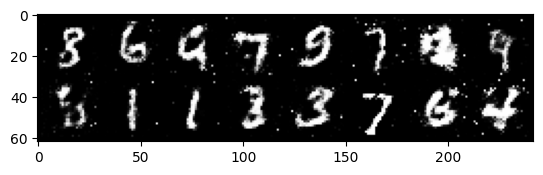

Epoch [41/200] Loss D: 0.4956, Loss G: 1.2536
Epoch [42/200] Loss D: 0.5008, Loss G: 1.5455
Epoch [43/200] Loss D: 0.3454, Loss G: 1.7370
Epoch [44/200] Loss D: 0.5537, Loss G: 1.2266
Epoch [45/200] Loss D: 0.5332, Loss G: 1.3334
Epoch [46/200] Loss D: 0.4014, Loss G: 1.7099
Epoch [47/200] Loss D: 0.4300, Loss G: 1.5244
Epoch [48/200] Loss D: 0.5431, Loss G: 1.6535
Epoch [49/200] Loss D: 0.5253, Loss G: 1.5546
Epoch [50/200] Loss D: 0.5223, Loss G: 1.6978


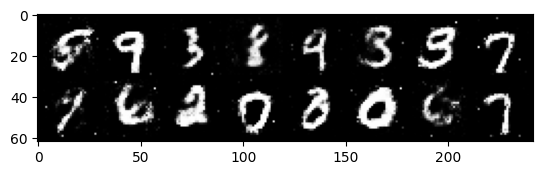

Epoch [51/200] Loss D: 0.4368, Loss G: 1.5981
Epoch [52/200] Loss D: 0.6108, Loss G: 1.3684
Epoch [53/200] Loss D: 0.4211, Loss G: 1.5459
Epoch [54/200] Loss D: 0.5783, Loss G: 1.2303
Epoch [55/200] Loss D: 0.4956, Loss G: 1.4534
Epoch [56/200] Loss D: 0.5700, Loss G: 1.4330
Epoch [57/200] Loss D: 0.5020, Loss G: 1.2616
Epoch [58/200] Loss D: 0.5527, Loss G: 1.3844
Epoch [59/200] Loss D: 0.4796, Loss G: 1.2805
Epoch [60/200] Loss D: 0.5594, Loss G: 1.1874


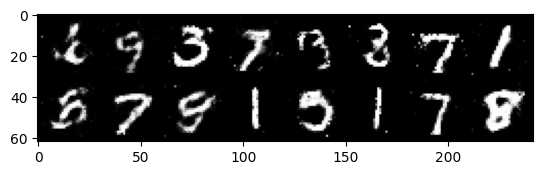

Epoch [61/200] Loss D: 0.5080, Loss G: 1.3965
Epoch [62/200] Loss D: 0.5725, Loss G: 1.6378
Epoch [63/200] Loss D: 0.5380, Loss G: 1.4250
Epoch [64/200] Loss D: 0.5933, Loss G: 1.1517
Epoch [65/200] Loss D: 0.5144, Loss G: 1.3898
Epoch [66/200] Loss D: 0.5859, Loss G: 1.5258
Epoch [67/200] Loss D: 0.5319, Loss G: 1.1446
Epoch [68/200] Loss D: 0.4732, Loss G: 1.1312
Epoch [69/200] Loss D: 0.6046, Loss G: 1.3942
Epoch [70/200] Loss D: 0.6036, Loss G: 1.3022


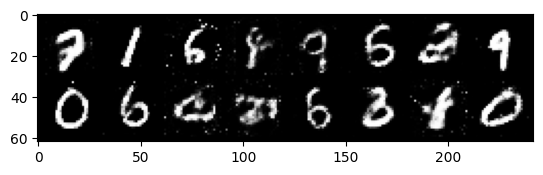

Epoch [71/200] Loss D: 0.5751, Loss G: 1.2692
Epoch [72/200] Loss D: 0.5274, Loss G: 1.3042
Epoch [73/200] Loss D: 0.5501, Loss G: 1.3750
Epoch [74/200] Loss D: 0.5741, Loss G: 1.4255
Epoch [75/200] Loss D: 0.5526, Loss G: 1.5073
Epoch [76/200] Loss D: 0.4378, Loss G: 1.3985
Epoch [77/200] Loss D: 0.5638, Loss G: 1.2883
Epoch [78/200] Loss D: 0.5256, Loss G: 1.2513
Epoch [79/200] Loss D: 0.5213, Loss G: 1.4213
Epoch [80/200] Loss D: 0.4314, Loss G: 1.2902


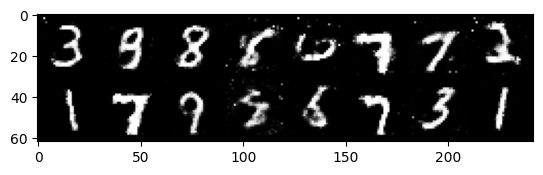

Epoch [81/200] Loss D: 0.5278, Loss G: 1.2572
Epoch [82/200] Loss D: 0.5169, Loss G: 1.5206
Epoch [83/200] Loss D: 0.4971, Loss G: 1.3076
Epoch [84/200] Loss D: 0.5952, Loss G: 1.4599
Epoch [85/200] Loss D: 0.4668, Loss G: 1.5586
Epoch [86/200] Loss D: 0.5537, Loss G: 1.1527
Epoch [87/200] Loss D: 0.6271, Loss G: 1.2438
Epoch [88/200] Loss D: 0.4369, Loss G: 1.7243
Epoch [89/200] Loss D: 0.4594, Loss G: 1.6523
Epoch [90/200] Loss D: 0.4732, Loss G: 1.4208


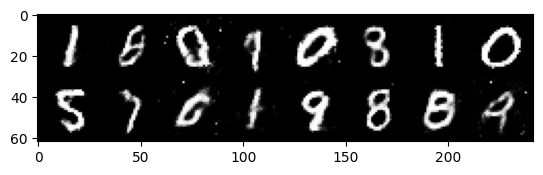

Epoch [91/200] Loss D: 0.4037, Loss G: 1.5207
Epoch [92/200] Loss D: 0.5594, Loss G: 1.2279
Epoch [93/200] Loss D: 0.7036, Loss G: 1.5063
Epoch [94/200] Loss D: 0.6122, Loss G: 1.4945
Epoch [95/200] Loss D: 0.4630, Loss G: 1.5711
Epoch [96/200] Loss D: 0.4962, Loss G: 1.4480
Epoch [97/200] Loss D: 0.4829, Loss G: 1.3699
Epoch [98/200] Loss D: 0.5129, Loss G: 1.4709
Epoch [99/200] Loss D: 0.4578, Loss G: 1.6405
Epoch [100/200] Loss D: 0.6588, Loss G: 1.1204


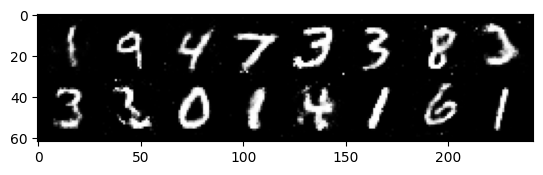

Epoch [101/200] Loss D: 0.4962, Loss G: 1.2599
Epoch [102/200] Loss D: 0.4401, Loss G: 1.4558
Epoch [103/200] Loss D: 0.5714, Loss G: 1.2762
Epoch [104/200] Loss D: 0.4846, Loss G: 1.2448
Epoch [105/200] Loss D: 0.5086, Loss G: 1.5300
Epoch [106/200] Loss D: 0.5487, Loss G: 1.1827
Epoch [107/200] Loss D: 0.4813, Loss G: 1.1133
Epoch [108/200] Loss D: 0.5465, Loss G: 1.1699
Epoch [109/200] Loss D: 0.5004, Loss G: 1.3814
Epoch [110/200] Loss D: 0.3637, Loss G: 1.5853


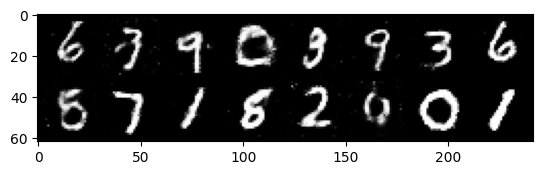

Epoch [111/200] Loss D: 0.6445, Loss G: 1.2882
Epoch [112/200] Loss D: 0.4559, Loss G: 1.4354
Epoch [113/200] Loss D: 0.4578, Loss G: 1.3632
Epoch [114/200] Loss D: 0.5223, Loss G: 1.4801
Epoch [115/200] Loss D: 0.4164, Loss G: 1.4718
Epoch [116/200] Loss D: 0.5452, Loss G: 1.4205
Epoch [117/200] Loss D: 0.5525, Loss G: 1.4649
Epoch [118/200] Loss D: 0.4686, Loss G: 1.5976
Epoch [119/200] Loss D: 0.5712, Loss G: 1.5156
Epoch [120/200] Loss D: 0.4524, Loss G: 1.4403


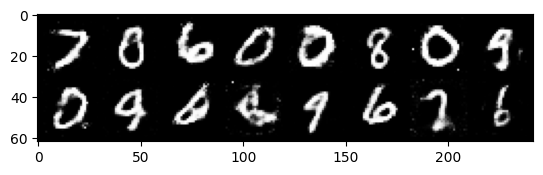

Epoch [121/200] Loss D: 0.4690, Loss G: 1.6293
Epoch [122/200] Loss D: 0.5016, Loss G: 1.4556
Epoch [123/200] Loss D: 0.4258, Loss G: 1.3349
Epoch [124/200] Loss D: 0.4899, Loss G: 1.4009
Epoch [125/200] Loss D: 0.5690, Loss G: 1.4870
Epoch [126/200] Loss D: 0.5356, Loss G: 1.6039
Epoch [127/200] Loss D: 0.6179, Loss G: 1.3369
Epoch [128/200] Loss D: 0.4538, Loss G: 1.5701
Epoch [129/200] Loss D: 0.5774, Loss G: 1.1159
Epoch [130/200] Loss D: 0.5238, Loss G: 1.5749


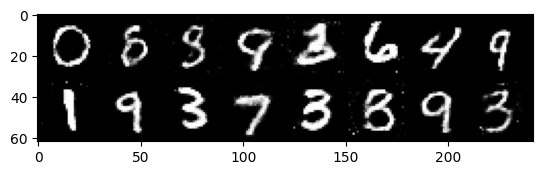

Epoch [131/200] Loss D: 0.5687, Loss G: 1.4661
Epoch [132/200] Loss D: 0.3923, Loss G: 1.4913
Epoch [133/200] Loss D: 0.6127, Loss G: 1.3977
Epoch [134/200] Loss D: 0.4959, Loss G: 1.5630
Epoch [135/200] Loss D: 0.4677, Loss G: 1.7602
Epoch [136/200] Loss D: 0.5366, Loss G: 1.3612
Epoch [137/200] Loss D: 0.5307, Loss G: 1.3721
Epoch [138/200] Loss D: 0.4924, Loss G: 1.4312
Epoch [139/200] Loss D: 0.5528, Loss G: 1.4366
Epoch [140/200] Loss D: 0.5051, Loss G: 1.3151


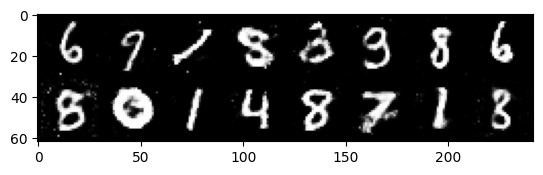

Epoch [141/200] Loss D: 0.5804, Loss G: 1.0747
Epoch [142/200] Loss D: 0.4291, Loss G: 1.3957
Epoch [143/200] Loss D: 0.5609, Loss G: 1.3836
Epoch [144/200] Loss D: 0.4488, Loss G: 1.4583
Epoch [145/200] Loss D: 0.6008, Loss G: 1.3841
Epoch [146/200] Loss D: 0.5581, Loss G: 1.1537
Epoch [147/200] Loss D: 0.4896, Loss G: 1.4335
Epoch [148/200] Loss D: 0.4041, Loss G: 1.5511
Epoch [149/200] Loss D: 0.4422, Loss G: 1.3076
Epoch [150/200] Loss D: 0.5917, Loss G: 1.1841


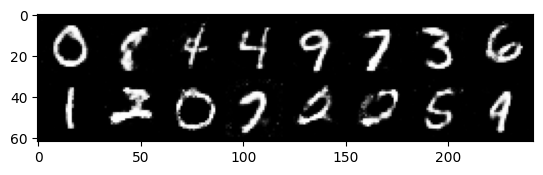

Epoch [151/200] Loss D: 0.3389, Loss G: 1.8226
Epoch [152/200] Loss D: 0.5890, Loss G: 1.1228
Epoch [153/200] Loss D: 0.5166, Loss G: 1.4469
Epoch [154/200] Loss D: 0.4500, Loss G: 1.2216
Epoch [155/200] Loss D: 0.5521, Loss G: 1.2691
Epoch [156/200] Loss D: 0.5249, Loss G: 1.4693
Epoch [157/200] Loss D: 0.4934, Loss G: 1.0482
Epoch [158/200] Loss D: 0.4538, Loss G: 1.9301
Epoch [159/200] Loss D: 0.5155, Loss G: 1.7905
Epoch [160/200] Loss D: 0.4779, Loss G: 1.7054


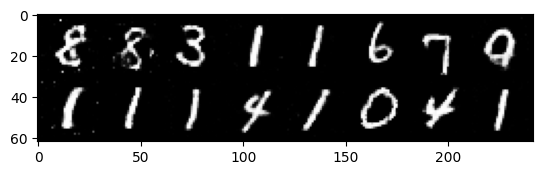

Epoch [161/200] Loss D: 0.5267, Loss G: 1.4220
Epoch [162/200] Loss D: 0.5381, Loss G: 1.3051
Epoch [163/200] Loss D: 0.5424, Loss G: 1.5535
Epoch [164/200] Loss D: 0.4868, Loss G: 1.3704
Epoch [165/200] Loss D: 0.5627, Loss G: 1.3868
Epoch [166/200] Loss D: 0.5373, Loss G: 1.1698
Epoch [167/200] Loss D: 0.5284, Loss G: 1.5869
Epoch [168/200] Loss D: 0.4325, Loss G: 1.8562
Epoch [169/200] Loss D: 0.4607, Loss G: 1.4555
Epoch [170/200] Loss D: 0.4869, Loss G: 1.6755


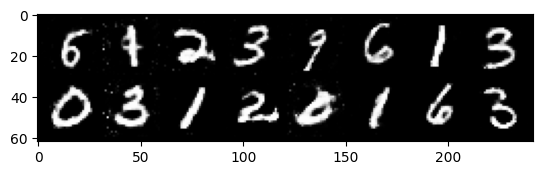

Epoch [171/200] Loss D: 0.5032, Loss G: 1.5842
Epoch [172/200] Loss D: 0.5154, Loss G: 1.2756
Epoch [173/200] Loss D: 0.5149, Loss G: 1.3361
Epoch [174/200] Loss D: 0.4847, Loss G: 1.6045
Epoch [175/200] Loss D: 0.5412, Loss G: 1.4428
Epoch [176/200] Loss D: 0.5703, Loss G: 2.1673
Epoch [177/200] Loss D: 0.4720, Loss G: 1.5057
Epoch [178/200] Loss D: 0.5220, Loss G: 1.3390
Epoch [179/200] Loss D: 0.5287, Loss G: 1.5332
Epoch [180/200] Loss D: 0.4623, Loss G: 1.6125


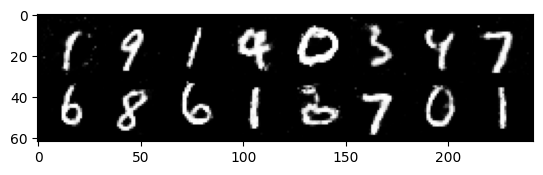

Epoch [181/200] Loss D: 0.4086, Loss G: 1.2405
Epoch [182/200] Loss D: 0.5037, Loss G: 1.4923
Epoch [183/200] Loss D: 0.4295, Loss G: 1.3984
Epoch [184/200] Loss D: 0.6152, Loss G: 1.1624
Epoch [185/200] Loss D: 0.5196, Loss G: 1.6680
Epoch [186/200] Loss D: 0.5571, Loss G: 1.3884
Epoch [187/200] Loss D: 0.5416, Loss G: 1.7862
Epoch [188/200] Loss D: 0.5196, Loss G: 1.2946
Epoch [189/200] Loss D: 0.5620, Loss G: 1.1678
Epoch [190/200] Loss D: 0.4444, Loss G: 1.4597


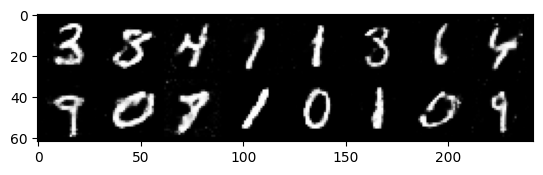

Epoch [191/200] Loss D: 0.5830, Loss G: 1.4017
Epoch [192/200] Loss D: 0.5777, Loss G: 1.7393
Epoch [193/200] Loss D: 0.5935, Loss G: 1.4450
Epoch [194/200] Loss D: 0.4728, Loss G: 1.4832
Epoch [195/200] Loss D: 0.4396, Loss G: 1.7932
Epoch [196/200] Loss D: 0.4531, Loss G: 1.5675
Epoch [197/200] Loss D: 0.4615, Loss G: 1.8177
Epoch [198/200] Loss D: 0.4611, Loss G: 1.7271
Epoch [199/200] Loss D: 0.4610, Loss G: 1.2609
Epoch [200/200] Loss D: 0.4182, Loss G: 1.5148


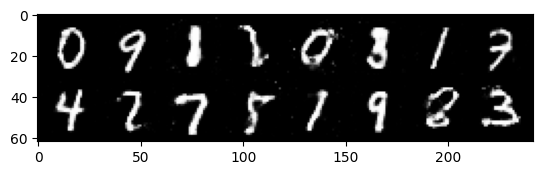

In [8]:
# Lists to store loss values
loss_history_gen = []
loss_history_disc = []

# Training loop
for epoch in range(num_epochs):
    loss_gen_epoch = 0
    loss_disc_epoch = 0
    
    for batch_idx, (real, _) in enumerate(train_loader):
        real = real.to(device)
        batch_size = real.size(0)

        # Train Discriminator: maximize log(D(x)) + log(1 - D(G(z)))
        noise = generate_noise(batch_size, z_dim, device)
        fake = gen(noise)

        disc_real = disc(real).view(-1)
        loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))

        disc_fake = disc(fake.detach()).view(-1)
        loss_disc_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

        loss_disc = (loss_disc_real + loss_disc_fake) / 2
        optimizer_disc.zero_grad()
        loss_disc.backward()
        optimizer_disc.step()

        # Train Generator: minimize log(1 - D(G(z))) <--> maximize log(D(G(z)))
        output = disc(fake).view(-1)
        loss_gen = criterion(output, torch.ones_like(output))

        optimizer_gen.zero_grad()
        loss_gen.backward()
        optimizer_gen.step()

        loss_gen_epoch += loss_gen.item()
        loss_disc_epoch += loss_disc.item()

    # Store losses for each epoch
    loss_history_gen.append(loss_gen_epoch / len(train_loader))
    loss_history_disc.append(loss_disc_epoch / len(train_loader))

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss D: {loss_disc.item():.4f}, Loss G: {loss_gen.item():.4f}")
    
    # Visualize the generated images after every 10 epochs
    if (epoch + 1) % 10 == 0:
        visualize_fake_images(gen, z_dim)

# Plot the loss history for both Generator and Discriminator
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(loss_history_gen, label="Generator Loss")
plt.plot(loss_history_disc, label="Discriminator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Generate final images
visualize_fake_images(gen, z_dim, num_images=16)

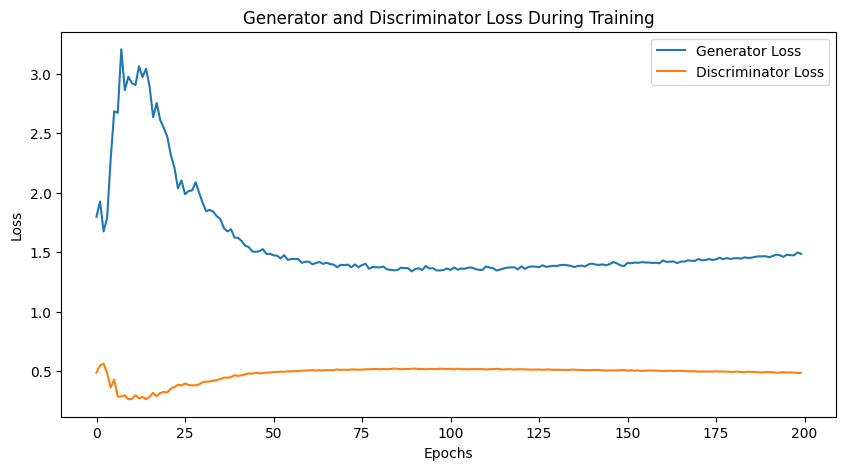

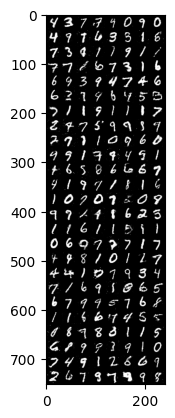

In [10]:
# Plot the loss history for both Generator and Discriminator
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(loss_history_gen, label="Generator Loss")
plt.plot(loss_history_disc, label="Discriminator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Generate final images
visualize_fake_images(gen, z_dim, num_images=200)